In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/Job_Placement_Data.csv')
print(data)

    gender  ssc_percentage ssc_board  hsc_percentage hsc_board hsc_subject  \
0        M           67.00    Others           91.00    Others    Commerce   
1        M           79.33   Central           78.33    Others     Science   
2        M           65.00   Central           68.00   Central        Arts   
3        M           56.00   Central           52.00   Central     Science   
4        M           85.80   Central           73.60   Central    Commerce   
..     ...             ...       ...             ...       ...         ...   
210      M           80.60    Others           82.00    Others    Commerce   
211      M           58.00    Others           60.00    Others     Science   
212      M           67.00    Others           67.00    Others    Commerce   
213      F           74.00    Others           66.00    Others    Commerce   
214      M           62.00   Central           58.00    Others     Science   

     degree_percentage undergrad_degree work_experience  emp_te

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [5]:
data.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [6]:
print(data.isnull().sum())

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64


In [7]:
X = data.drop("status", axis=1)
y = data["status"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset from CSV
data = pd.read_csv('/content/Job_Placement_Data.csv')

# Separate features and target variable
X = data.drop(columns=['status'])  # Features
y = data['status']  # Target variable

# Identify categorical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(conf_matrix)

Accuracy: 0.8837209302325582
Classification Report:
              precision    recall  f1-score   support

  Not Placed       0.82      0.75      0.78        12
      Placed       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43

Confusion Matrix
[[ 9  3]
 [ 2 29]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

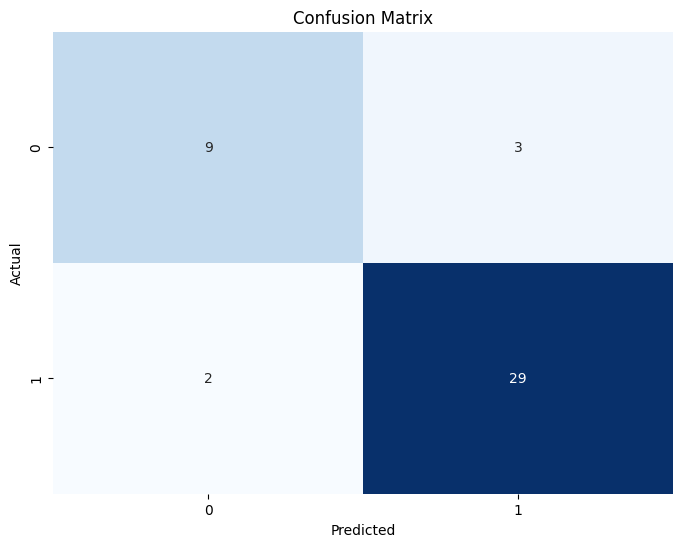

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('KNN predicted values:',y_pred_knn)

KNN predicted values: ['Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Not Placed' 'Not Placed'
 'Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Not Placed' 'Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed' 'Placed' 'Not Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed']


In [14]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('SVM predicted values:',y_pred_svm)

SVM predicted values: ['Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Not Placed'
 'Not Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Not Placed'
 'Placed' 'Placed' 'Not Placed' 'Placed' 'Not Placed' 'Not Placed'
 'Placed' 'Placed' 'Placed' 'Not Placed' 'Not Placed' 'Placed' 'Placed'
 'Not Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Placed']


In [15]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
print('Decision Tree predicted values:',y_pred_dec_tree)

Decision Tree predicted values: ['Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Not Placed'
 'Not Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Not Placed'
 'Not Placed' 'Placed' 'Not Placed' 'Placed' 'Not Placed' 'Not Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed'
 'Not Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Not Placed'
 'Not Placed' 'Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Placed' 'Placed']


In [16]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
print('KNN Accuracy:',knn_accuracy)
print('KNN Precision:',knn_precision)
print('KNN Recall:',knn_recall)
print('KNN Confusion Matrix:',knn_confusion_matrix)

KNN Accuracy: 0.7906976744186046
KNN Precision: 0.7800849021779254
KNN Recall: 0.7906976744186046
KNN Confusion Matrix: [[ 5  7]
 [ 2 29]]


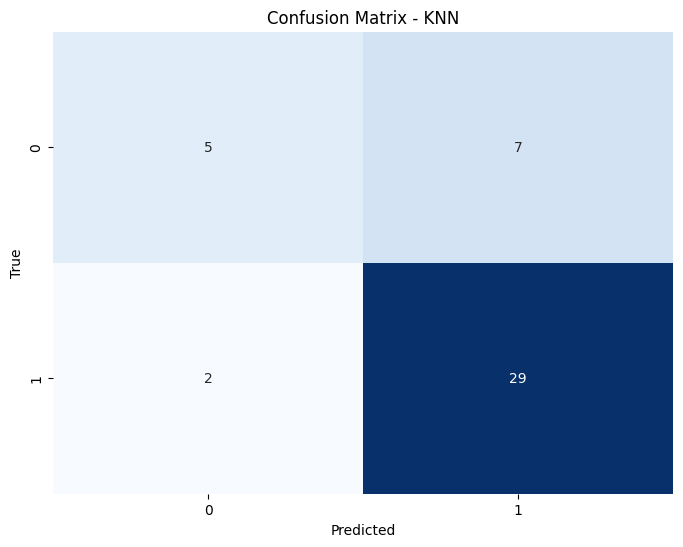

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(knn_confusion_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [18]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_confusion_matrix = confusion_matrix(y_test, y_pred_svm)
print('SVM Accuracy:',svm_accuracy)
print('SVM Precision:',svm_precision)
print('SVM Recall:',svm_recall)
print('SVM Confusion Matrix:',svm_confusion_matrix)

SVM Accuracy: 0.8837209302325582
SVM Precision: 0.8816728329809725
SVM Recall: 0.8837209302325582
SVM Confusion Matrix: [[ 9  3]
 [ 2 29]]


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

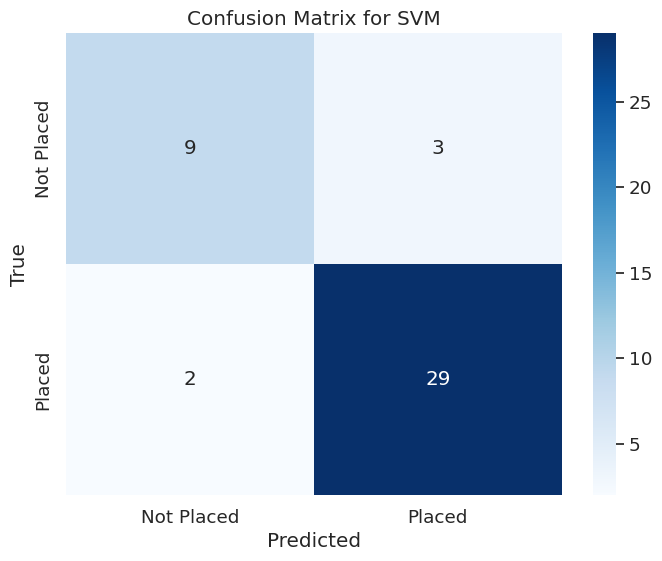

In [20]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(svm_confusion_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')
plt.show()

In [21]:
dec_tree_accuracy = accuracy_score(y_test, y_pred_dec_tree)
dec_tree_precision = precision_score(y_test, y_pred_dec_tree, average='weighted')
dec_tree_recall = recall_score(y_test, y_pred_dec_tree, average='weighted')
dec_tree_confusion_matrix = confusion_matrix(y_test, y_pred_dec_tree)
print('Decision Tree Accuracy:',dec_tree_accuracy)
print('Decision Tree Precision:',dec_tree_precision)
print('Decision Tree Recall:',dec_tree_recall)
print('Decision Tree Confusion Matrix:',dec_tree_confusion_matrix)

Decision Tree Accuracy: 0.8372093023255814
Decision Tree Precision: 0.8420393559928445
Decision Tree Recall: 0.8372093023255814
Decision Tree Confusion Matrix: [[ 9  3]
 [ 4 27]]


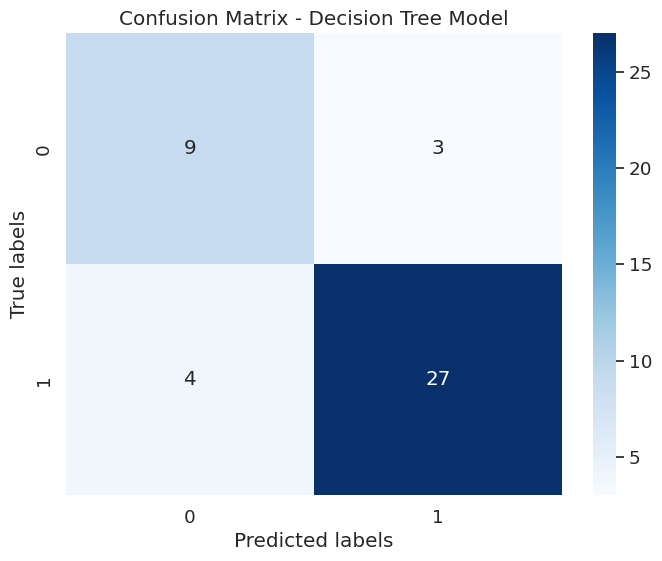

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(dec_tree_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree Model')
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)

Random Forest Metrics:
Accuracy: 0.813953488372093
Precision: 0.8070472163495419
Recall: 0.813953488372093
F1-score: 0.8084038054968289


In [26]:
adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ab = adaboost.predict(X_test)
ab_accuracy = accuracy_score(y_test, y_pred_ab)
ab_precision = precision_score(y_test, y_pred_ab, average='weighted')
ab_recall = recall_score(y_test, y_pred_ab, average='weighted')
ab_f1 = f1_score(y_test, y_pred_ab, average='weighted')
print("\nAdaBoost Metrics:")
print("Accuracy:", ab_accuracy)
print("Precision:", ab_precision)
print("Recall:", ab_recall)
print("F1-score:", ab_f1)


AdaBoost Metrics:
Accuracy: 0.8604651162790697
Precision: 0.862126245847176
Recall: 0.8604651162790697
F1-score: 0.8507399577167019
